In [ ]:
pip install rasterio

In [19]:
pip install earthpy

     |████████████████████████████████| 1.4MB 22.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.0MB 33.2MB/s 
     |████████████████████████████████| 6.6MB 33.1MB/s 
     |████████████████████████████████| 15.4MB 189kB/s 
  Created wheel for earthpy: filename=earthpy-0.9.2-cp37-none-any.whl size=1365096 sha256=c61dcd692afc431e9c260ffc8f84f843f96b30a4e06a212d64497565f297618d
  Stored in directory: /root/.cache/pip/wheels/27/f9/a5/026bb95ef7b12f9343b842da6897b4001c5b902550095cbbbe
Successfully built earthpy


In [20]:
## Requirements :

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from osgeo import gdal
import sys
import os
# To show the image
import rasterio
from rasterio.plot import show
# plot hists
import earthpy.plot as ep

In [21]:
from matplotlib.colors import ListedColormap
import plotly.graph_objects as go#test

In [ ]:
from glob import glob

In [22]:
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [ ]:
 S_sentinel_bands = glob("/content/drive/MyDrive/Zakarya/test/*.tif")

In [ ]:
S_sentinel_bands[0]

'/content/drive/MyDrive/Zakarya/test/20190531T163901_20190531T165213_T16TCK.tif'

In [23]:
def tif_to_matrix(path):
  print(path)
  src_ds = gdal.Open(path)
  data = src_ds.ReadAsArray()
  return data 

In [24]:
from osgeo import gdal
data = tif_to_matrix('/content/drive/MyDrive/Zakarya/dump_test/20200219T112111_20200219T112435_T29TQF.tif')

/content/drive/MyDrive/Zakarya/dump_test/20200219T112111_20200219T112435_T29TQF.tif


In [25]:
data.shape

(4, 100, 191)

In [47]:
l = []
i = '/content/drive/MyDrive/Zakarya/dump_test/20200216T111131_20200216T111437_T29TQF.tif'
#for i in S_sentinel_bands[0]:
with rasterio.open(i) as f:
  for i in range (1,5): 
    l.append(f.read(i))

arr_st = np.stack(l)
#arr_st = np.array(l)

In [40]:
src = rasterio.open('/content/drive/MyDrive/Zakarya/dump_test/20200216T111131_20200216T111437_T30TTL.tif')

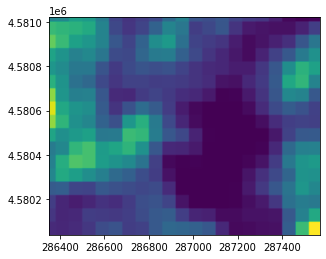

In [41]:
show(src)

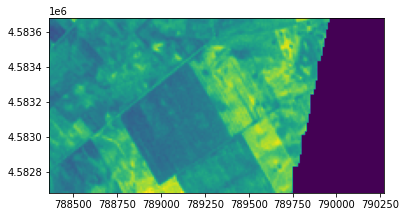

In [29]:
show(src)

In [ ]:
l[0].shape

(10980, 10982)

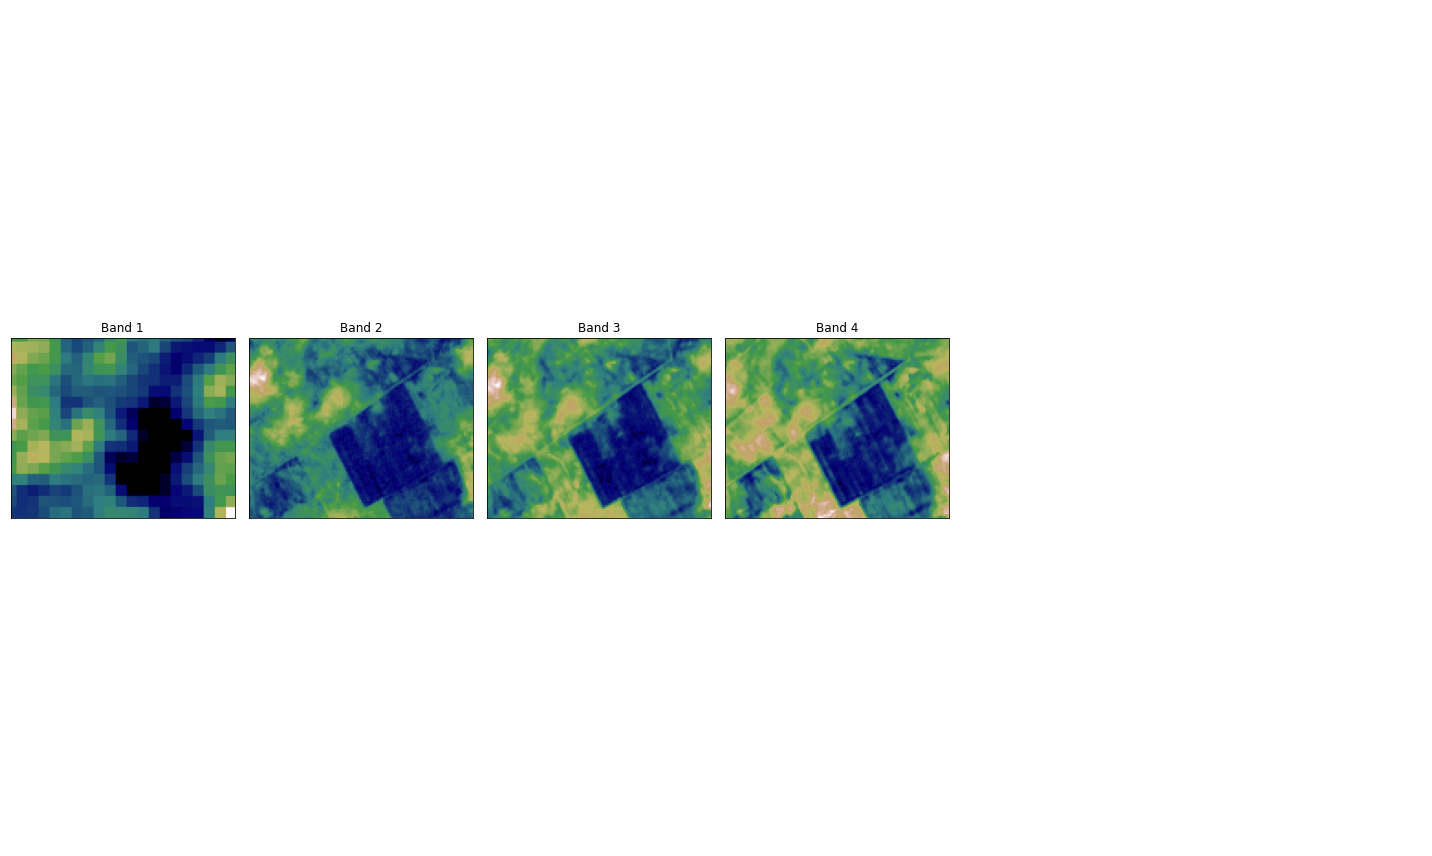

In [45]:
ep.plot_bands(arr_st, cmap = 'gist_earth', figsize = (20, 12), cols = 6, cbar = False)
plt.show()

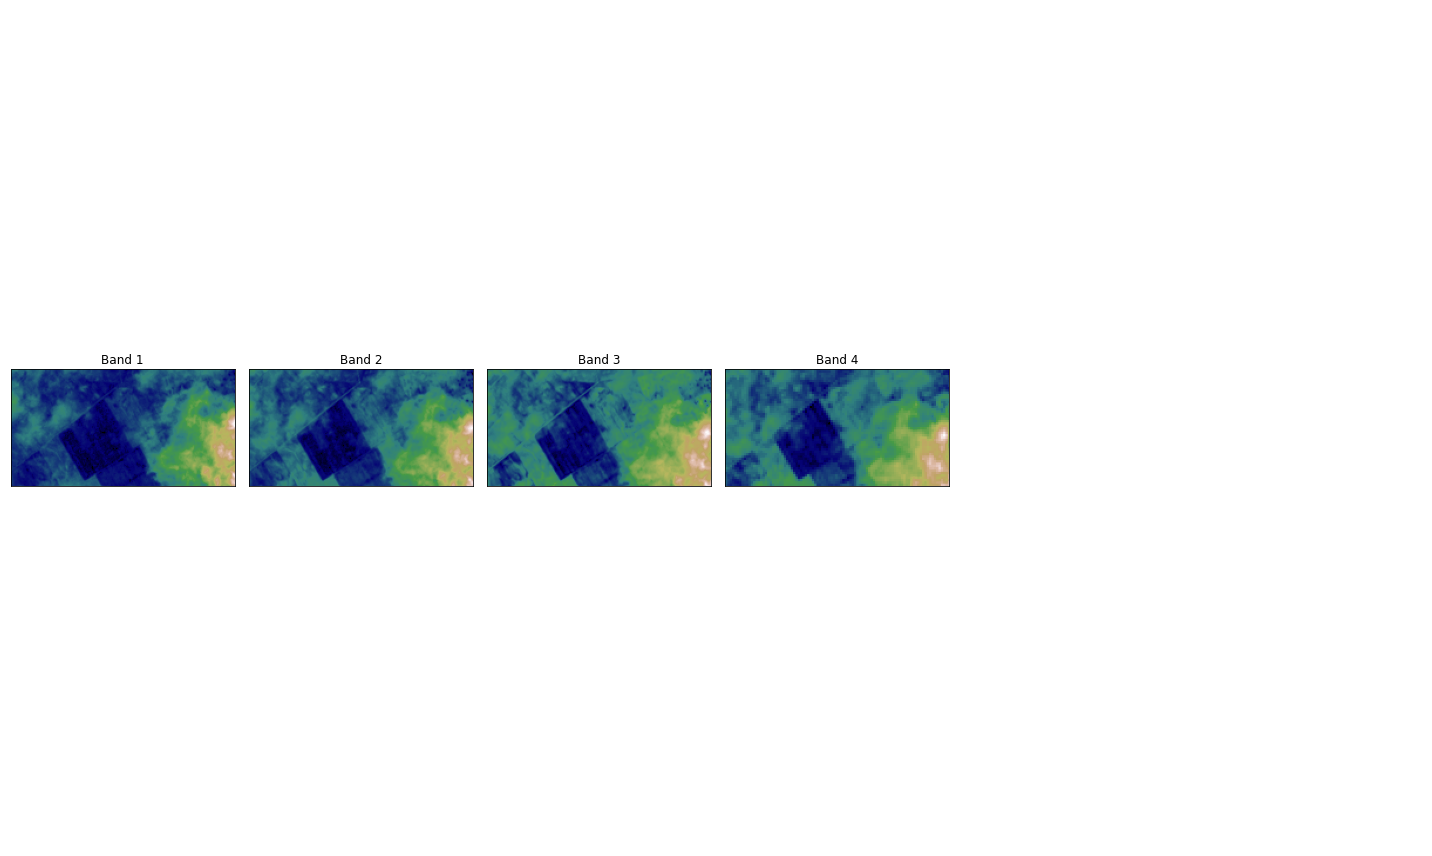

In [48]:
## Image Bands : 

ep.plot_bands(arr_st, cmap = 'gist_earth', figsize = (20, 12), cols = 6, cbar = False)
plt.show()

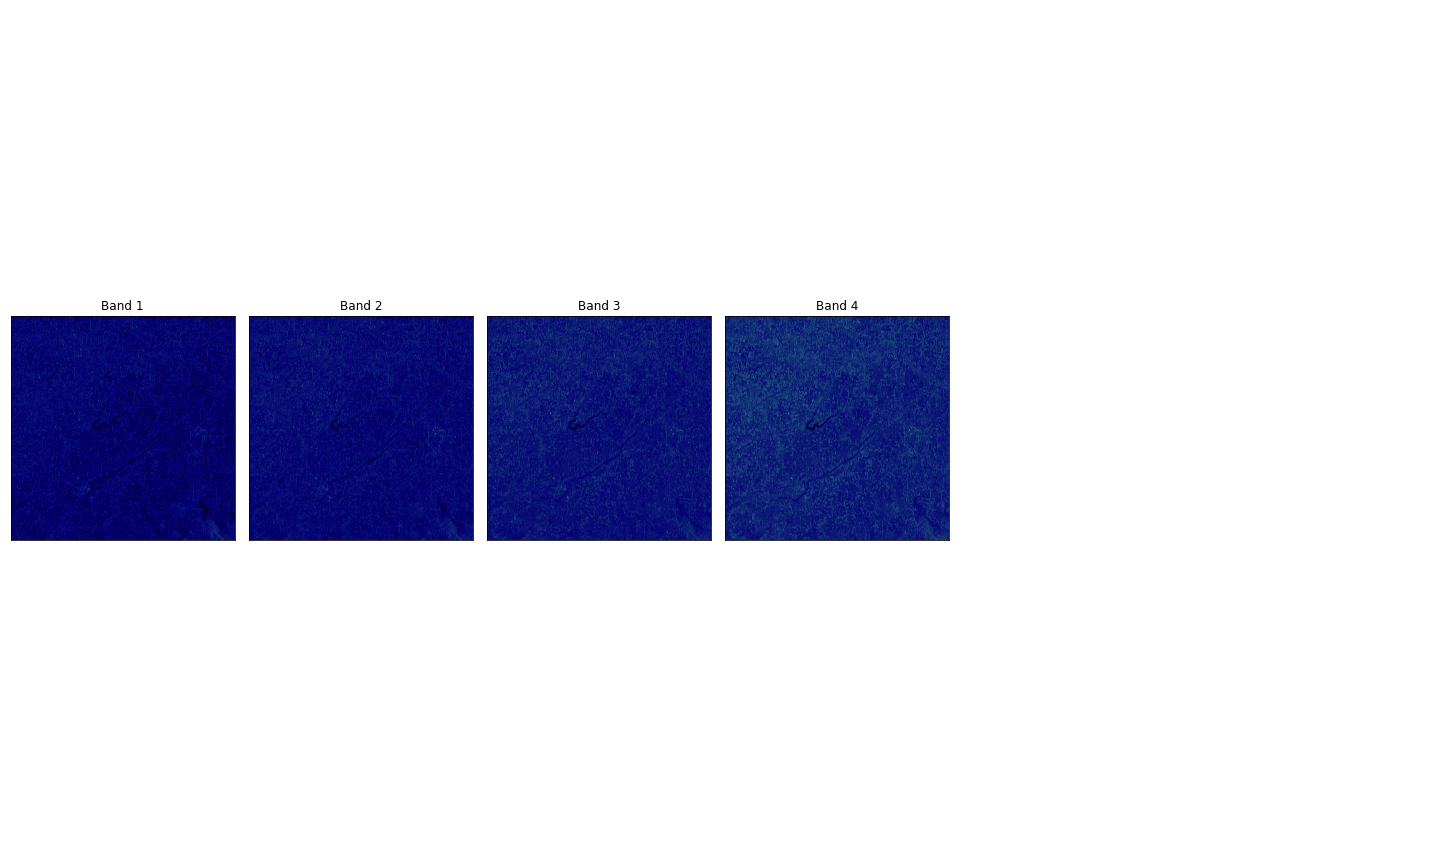

In [ ]:
## Image Bands : 

ep.plot_bands(arr_st, cmap = 'gist_earth', figsize = (20, 12), cols = 6, cbar = False)
plt.show()

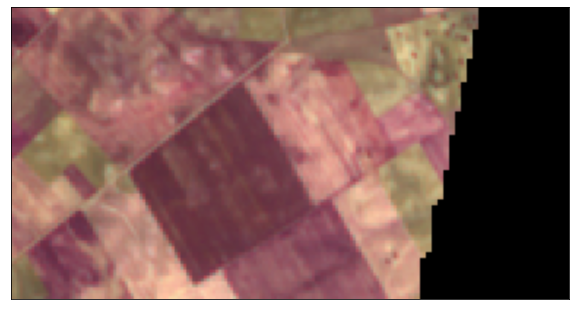

In [33]:
# RGB Composite Image with Strech

ep.plot_rgb(arr_st,
            rgb=(3, 2, 1),
            
            str_clip=0.2)

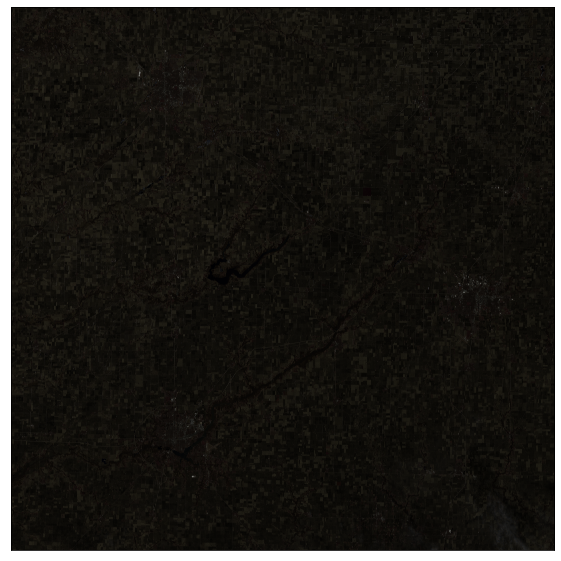

In [ ]:
# RGB Composite Image with Strech

ep.plot_rgb(arr_st,
            rgb=(3, 2, 1),
            
            str_clip=0.2)

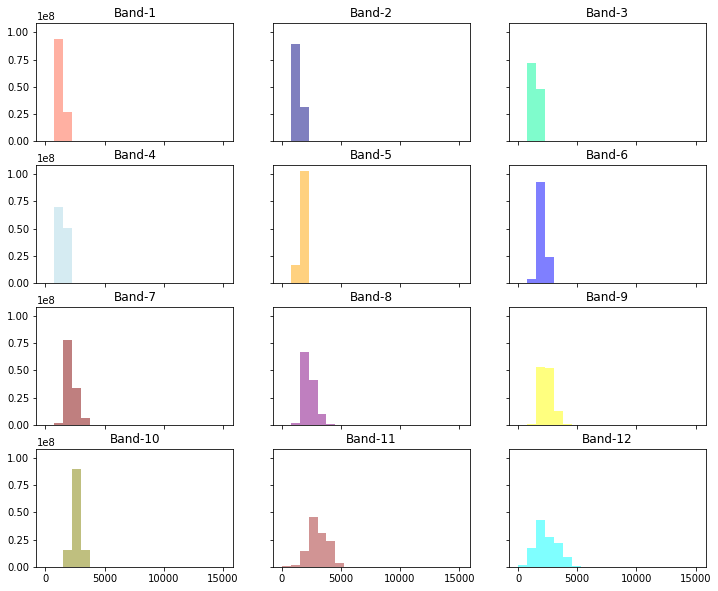

In [ ]:
## Histograms :

colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan']
ep.hist(arr_st, 
         colors = colors,
        title=[f'Band-{i}' for i in range(1, 13)], 
        cols=3, 
        alpha=0.5, 
        figsize = (12, 10)
        )

plt.show()

[link text](https://)## Normalized Difference Vegetation Index (NDVI) :

To determine the density of green on a patch of land, researchers must observe the distinct colors (wavelengths) of visible(VIS) and near-infrared (NIR)sunlight reflected by the plants. The Normalized Difference Vegetation Index (NDVI) quantifies vegetation by measuring the difference between near-infrared which vegetation strongly reflects and red light (which vegetation absorbs). NDVI always ranges from -1 to +1.

/usr/local/lib/python3.7/dist-packages/earthpy/spatial.py:105: RuntimeWarning:

invalid value encountered in true_divide



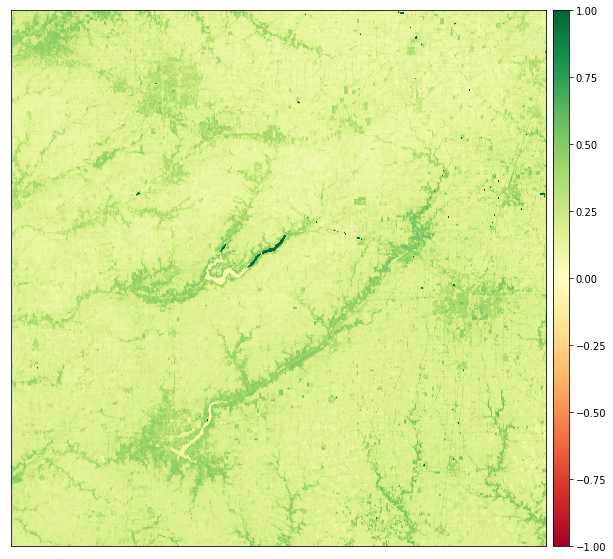

In [ ]:
## Normalized Difference Vegetation Index (NDVI) :

ndvi = es.normalized_diff(arr_st[7], arr_st[3])

ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

## Soil Adjusted Vegetation Index (SAVI) :

The Soil-Adjusted Vegetation Index (SAVI) is a vegetation index that attempts to minimize soil brightness influences using a soil-brightness correction factor. This is often used in arid regions where vegetative cover is low.

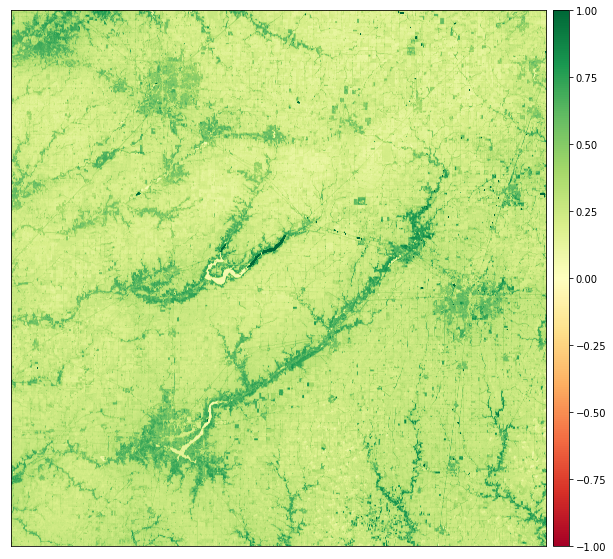

In [ ]:
L = 0.5

savi = ((arr_st[7] - arr_st[3]) / (arr_st[7] + arr_st[3] + L)) * (1 + L)

ep.plot_bands(savi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

## Visible Atmospherically Resistant Index (VARI) :

The Visible Atmospherically Resistant Index (VARI) is designed to emphasize vegetation in the visible portion of the spectrum while mitigating illumination differences and atmospheric effects. It is ideal for RGB or color images; it utilizes all three color bands.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning:

invalid value encountered in true_divide



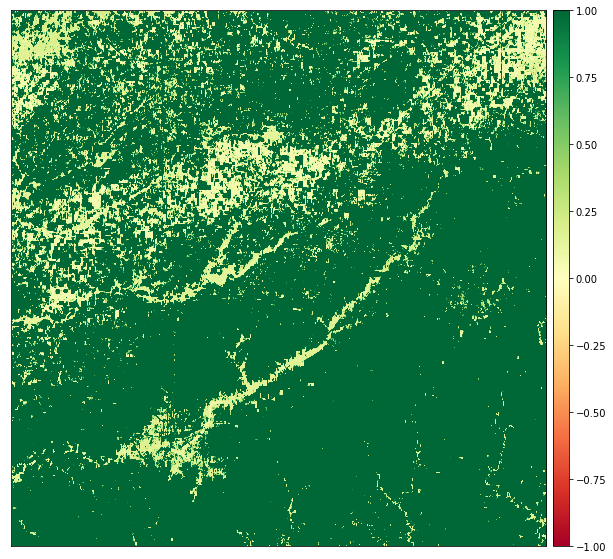

In [ ]:
vari = (arr_st[2] - arr_st[3])/ (arr_st[2] + arr_st[3] - arr_st[1])

ep.plot_bands(vari, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14)) 

plt.show()

## Modified Normalized Difference Water Index (MNDWI) :

The Modified Normalized Difference Water Index (MNDWI) uses green and SWIR bands for the enhancement of open water features. It also diminishes built-up area features that are often correlated with open water in other indices.

/usr/local/lib/python3.7/dist-packages/earthpy/spatial.py:105: RuntimeWarning:

invalid value encountered in true_divide



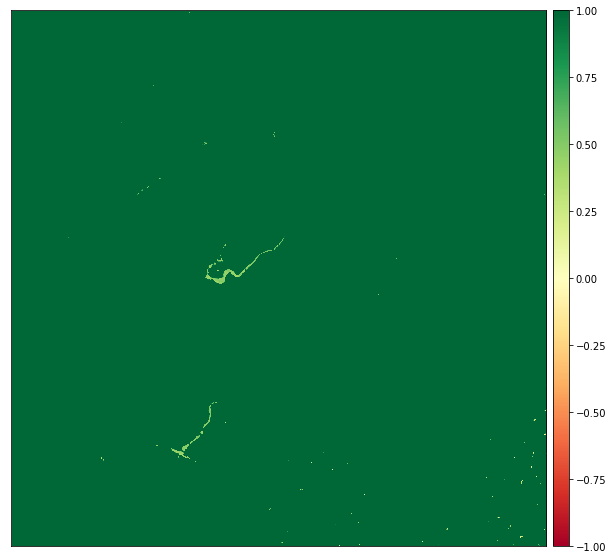

In [ ]:
mndwi = es.normalized_diff(arr_st[2], arr_st[10])

ep.plot_bands(mndwi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

## Normalized Difference Moisture Index (NDMI) : 

The Normalized Difference Moisture Index (NDMI) is sensitive to the moisture levels in vegetation. It is used to monitor droughts as well as monitor fuel levels in fire-prone areas. It uses NIR and SWIR bands to create a ratio designed to mitigate illumination and atmospheric effects.

/usr/local/lib/python3.7/dist-packages/earthpy/spatial.py:105: RuntimeWarning:

invalid value encountered in true_divide



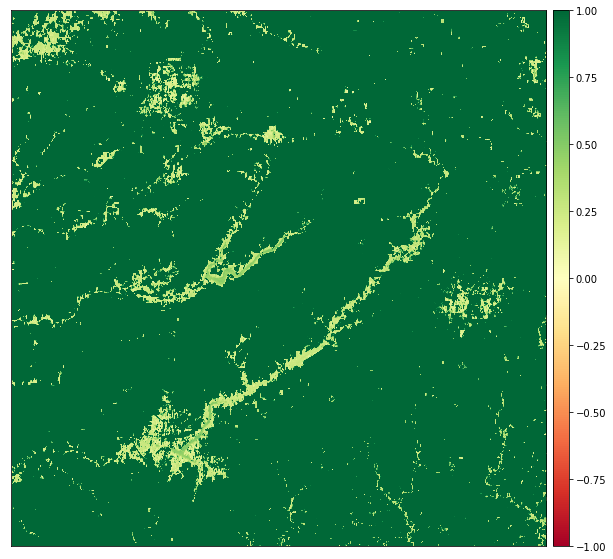

In [ ]:
ndmi = es.normalized_diff(arr_st[7], arr_st[10])

ep.plot_bands(ndmi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

## Clay Minerals :
The clay ratio is a ratio of the SWIR1 and SWIR2 bands. This ratio leverages the fact that hydrous minerals such as clays, alunite absorb radiation in the 2.0–2.3 micron portion of the spectrum. This index mitigates illumination changes due to terrain since it is a ratio

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning:

invalid value encountered in true_divide



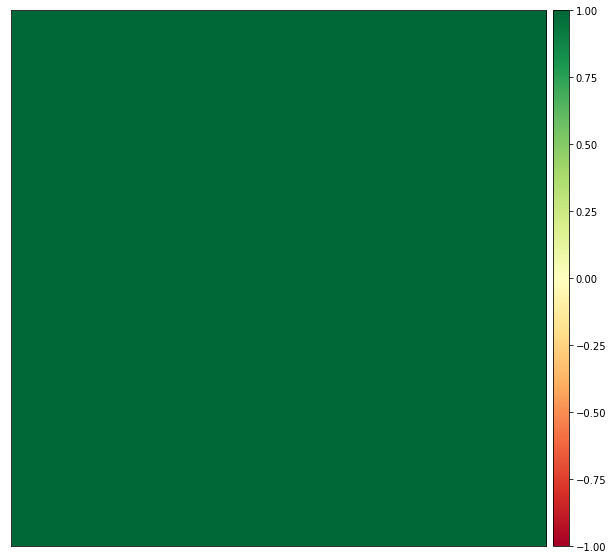

In [ ]:
cmr = np.divide(arr_st[10], arr_st[11])

ep.plot_bands(cmr, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

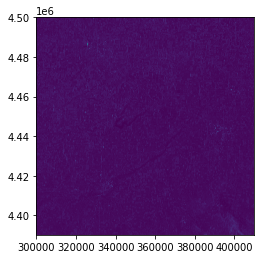

In [ ]:
## Show a tif image :

src = rasterio.open('/content/drive/MyDrive/export/20200220T164319_20200220T164334_T16TCK.tif')
show(src)

In [ ]:
## Calculate images dimensions : 

src.bounds
print("Image width is "+ str(src.bounds[2]-src.bounds[0])+"m, and height is "+ str(src.bounds[3]-src.bounds[1])+"m")
src.width, src.height

Image width is 109820.0m, and height is 109800.0m


(10982, 10980)

In [ ]:
## visualize specific band combination : 

# Open the file:
raster = rasterio.open('/content/drive/MyDrive/export/20200220T164319_20200220T164334_T16TCK.tif')

# Normalize bands into 0.0 - 1.0 scale
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

# Convert to numpy arrays
nir = raster.read(4)
red = raster.read(3)
green = raster.read(2)

# Normalize band DN
nir_norm = normalize(nir)
red_norm = normalize(red)
green_norm = normalize(green)

# Stack bands
nrg = np.dstack((nir_norm, red_norm, green_norm))
#nrg = np.dstack((red_norm, green_norm))
# View the color composite
plt.imshow(nrg)

In [ ]:
## Open image as array with GDAL :

directory = '/content/drive/MyDrive/test'
data_list =[]
for filename in os.listdir(directory):
    if filename.endswith(".tif"):
      src_ds = gdal.Open( "/content/drive/MyDrive/test/" +str(filename))
      data=src_ds.ReadAsArray()
      data_list.append(data)
      print(filename)

In [ ]:
# raster file and reads a band of the raster into a numpy array

filepath = r'/content/drive/MyDrive/Zakarya/test/20190401T163901_20190401T165214_T16TCK.tif'

# Open the file:
raster = gdal.Open(filepath)

# Check type of the variable 'raster'
type(raster)

#img_array = ds.ReadAsArray()

In [ ]:
# Projection
raster.GetProjection()

# Dimensions
print(raster.RasterXSize)
print(raster.RasterYSize)

# Number of bands
print(raster.RasterCount)

# Metadata for the raster dataset
raster.GetMetadata()

In [ ]:
# Read the raster band as separate variable
band = raster.GetRasterBand(1)

# Check type of the variable 'band'
type(band)

# Data type of the values
gdal.GetDataTypeName(band.DataType)

In [ ]:
# Compute statistics if needed
if band.GetMinimum() is None or band.GetMaximum()is None:
    band.ComputeStatistics(0)
    print("Statistics computed.")

# Fetch metadata for the band
band.GetMetadata()

# Print only selected metadata:
print ("[ NO DATA VALUE ] = ", band.GetNoDataValue()) # none
print ("[ MIN ] = ", band.GetMinimum())
print ("[ MAX ] = ", band.GetMaximum())

In [ ]:
## Open cropped Image : 

path = '/content/drive/MyDrive/Zakarya/dump_test/20190521T163901_20190521T164606_T16TCK.npy'
with open(path, 'rb') as f:
    data = np.load(f)

In [ ]:
## Visualize : 
type(data)
data.shape

In [ ]:
np.var(data), np.mean(data)

In [ ]:
 ## Normalize bands into 0.0 - 1.0 scale : 

def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)



data_norm = normalize(data)
np.var(green_norm)
np.std(green_norm)


In [ ]:
## 3D Plot of image bands : 

import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
z, x, y = data_norm.nonzero()
ax.scatter(x, y, z, c=z, alpha=1)
plt.show()

In [ ]:
## Image bands as hists :

colors_list = [
    "midnightblue",
    "Blue",
    "Green",
    "Red",
    "Maroon",
    "Purple",
    "Violet",
    "midnightblue",
    "Blue",
    "Green",
    "Red",
    "Maroon"
]
titles = ["Aerosols", "Blue", "Green", "Red","Red Edge 1", "Red Edge 2", "Red Edge 3","NIR","Red Edge 4", "Water vapor","SWIR 1", "SWIR 2"]
ep.hist(green_norm, colors=colors_list, title=titles)
plt.show()

## Cropped images :

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 7,7 
import seaborn as sns
import numpy as np
sns.set(color_codes=True, font_scale=1.2)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [ ]:
!pip install heatmapz

In [ ]:
# Import the two methods from heatmap library
from heatmap import heatmap, corrplot

In [ ]:
def npy_to_matrix(path): 
 # print(path)
  with open(path, 'rb') as f:
    data = np.load(f)
  return data

In [ ]:
# Normalize bands into 0.0 - 1.0 scale
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

In [ ]:
import os
List_images = []
directory = r'/content/drive/MyDrive/Zakarya/dump_test'
for filename in os.listdir(directory):
    if filename.endswith(".npy") :
        image = npy_to_matrix(os.path.join(directory, filename))
        list_bands=[]
        for i in range (12) :
          band = normalize(image[i])
          list_bands.append(band.mean())
        List_images.append(list_bands)

        
   

In [ ]:
List_images = np.array(List_images)

In [ ]:
List_images.shape

(73, 12)

In [ ]:
df_bands = pd.DataFrame(List_images,columns=['B1','B2','B3','B4','B5','B6','B7','B8','B8A','B9','B10','B11'])

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Zakarya/datasets/Whole_dataset.csv")

In [ ]:
df_bands['soil_moisture'] = df["soil_moisture_depth_0.050"]

In [ ]:
df_bands.head()

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B10,B11,soil_moisture
0,0.190370,0.083106,0.083402,0.112501,0.172228,0.230973,0.240175,0.207006,0.270133,0.279124,0.504178,0.393356,0.379
1,0.533797,0.509470,0.513283,0.517059,0.521856,0.524057,0.524940,0.515461,0.518761,0.573146,0.547447,0.607332,0.458
2,0.452141,0.465091,0.462623,0.458789,0.447573,0.458389,0.454160,0.459866,0.461030,0.001389,0.399228,0.561334,0.258
3,0.276834,0.270529,0.275936,0.287385,0.292601,0.299445,0.307005,0.308113,0.318252,0.347088,0.398504,0.387378,0.431
4,0.575224,0.530301,0.589116,0.561182,0.559492,0.551933,0.551679,0.555869,0.548788,0.569821,0.547189,0.488430,0.447


In [ ]:
df_bands.corr()

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B10,B11,soil_moisture
B1,1.000000,0.969522,0.967441,0.970727,0.981288,0.745953,0.551605,0.580819,0.490953,0.515215,0.470875,0.637117,0.323182
B2,0.969522,1.000000,0.997839,0.993420,0.976674,0.755996,0.577966,0.629455,0.507260,0.468692,0.501104,0.680489,0.340311
B3,0.967441,0.997839,1.000000,0.995646,0.980978,0.770771,0.595174,0.644219,0.526737,0.470838,0.521030,0.692426,0.336561
B4,0.970727,0.993420,0.995646,1.000000,0.988673,0.752128,0.567695,0.612001,0.502972,0.468121,0.557500,0.725226,0.355147
B5,0.981288,0.976674,0.980978,0.988673,1.000000,0.784331,0.593481,0.622647,0.540171,0.520458,0.569733,0.715096,0.331976
B6,0.745953,0.755996,0.770771,0.752128,0.784331,1.000000,0.955223,0.953647,0.932505,0.642720,0.474439,0.490577,-0.062919
B7,0.551605,0.577966,0.595174,0.567695,0.593481,0.955223,1.000000,0.983550,0.990416,0.595864,0.384958,0.348489,-0.225564
B8,0.580819,0.629455,0.644219,0.612001,0.622647,0.953647,0.983550,1.000000,0.963199,0.566519,0.361538,0.355948,-0.196909
B8A,0.490953,0.507260,0.526737,0.502972,0.540171,0.932505,0.990416,0.963199,1.000000,0.597066,0.384915,0.319853,-0.274959
B9,0.515215,0.468692,0.470838,0.468121,0.520458,0.642720,0.595864,0.566519,0.597066,1.000000,0.251537,0.230204,-0.012278


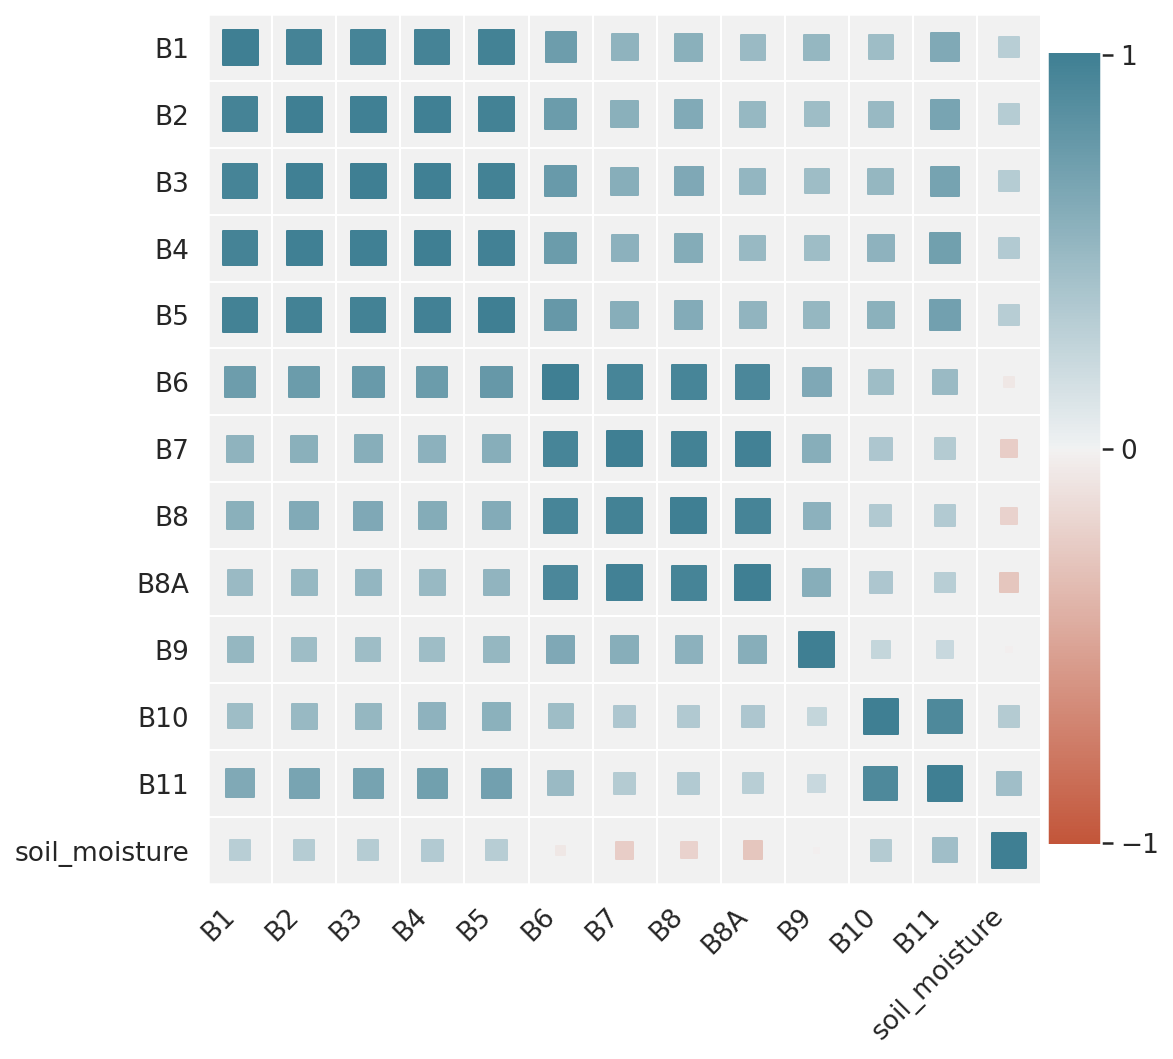

In [ ]:
plt.figure(figsize=(8, 8))
corrplot(df_bands.corr(), size_scale=300);

In [ ]:
image = npy_to_matrix('/content/drive/MyDrive/Zakarya/dump_test/20190401T163901_20190401T165214_T16TCK.npy')
plt.imshow(image[11])

In [ ]:
plt.imshow(image[11])

In [ ]:
## Normalized Difference Vegetation Index (NDVI) :

ndvi = es.normalized_diff(image[7], image[3])

ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

In [ ]:
# RGB Composite Image with Strech

ep.plot_rgb(image,
            rgb=(3, 2, 1),
            str_clip=0.2)

In [ ]:
ndmi = es.normalized_diff(image[7], image[10])

ep.plot_bands(ndmi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

In [ ]:
image[0]

In [ ]:
data1 = normalize(image)

In [ ]:
data1[0].mean()